# Lok Sabha Election 2019: Data Analysis and Visualization using Python
<hr>
<img src="https://www.ft.com/__origami/service/image/v2/images/raw/http%3A%2F%2Fcom.ft.imagepublish.upp-prod-us.s3.amazonaws.com%2F5c2322c8-7deb-11e9-81d2-f785092ab560?fit=scale-down&source=next&width=700" width="1000">

## 1. Table of contents

1. Introduction
2. Environment setup
3. Gathering the data
4. Exploring and visualizing the data
    - Exit poll predictions and results
    - Analysing the candidates
    - Comparisons between states
    - Analysing key constituencies and states
    - Journey of two biggest parties from 1980 to 2019
5. Conclusion
<hr>

## 1. Introduction
<hr>

<p> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/March_2020_Parliament_Lok_sabha.svg/1200px-March_2020_Parliament_Lok_sabha.svg.png", style="float:left", width="300", height="180"> The Lok Sabha is composed of representatives of the people chosen by direct election on the basis of the adult suffrage. The maximum strength of the House envisaged by the Constitution is 552, which is made up by election of upto 530 members to represent the States, upto 20 members to represent the Union Territories and not more than two members of the Anglo-Indian Community to be nominated by the Hon'ble President, if,  in his/her opinion, that community is not adequately represented in the House. The total elective membership is distributed among the States in such a way that the ratio between the number of seats allotted to each State and the population of the State is, so far as practicable, the same for all States.</p>
<p> 

## 2. Environment setup
<hr>

In [1]:
#Import all the packages necessary for the visualization of data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotly import tools
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode
%matplotlib inline
init_notebook_mode(connected=True)

## 3. Gathering the data
<hr>

In [2]:
#Exit poll data
exitPoll2019df = pd.read_csv("data/2019ExitPolls.csv")
#Candidate data
candidatedf = pd.read_csv("data/CANDIDATE_ANALYSED_LIST.csv")
#Criminal data
criminaldf = pd.read_csv("data/PENDING_CRIMINAL_CASES_BY_STATE.csv")
#State data
statedf = pd.read_csv("data/STATES_INDEX.csv")
#Seat data 1980 to 2019
seats1980to2019 = pd.read_csv("data/1980to2019.csv")
#Amethi data 1980 to 2019
amethi1980to2019 = pd.read_csv("data/amethi1980to2019.csv")

## 4. Exploring and visualizing the data
<hr>

### 4.1 Lok sabha election 2019: Exit poll predictions and results

#### 4.1.1 Exit poll predictions

> <p>From the exit polls itself, we can make an idea about who is going to win the Lok Sabha elections of 2019. The only question is by how many seats and whether NDA will be able to increase their seat share compared to the 2014 Lok Sabha elections. Let us look at what each agency and news channel has predicted in tabular form and bar graph. These were some of the headlines of leading news agencies after the exit poll results were published - <br>
    <i>"Modi Likely To Return To Power, With Polls Predicting NDA Majority" - Bloomberg</i> <br>
    <i>"Exit polls predict another huge Modi win, forecast 277-352 for NDA" - Times of India</i> 
  </p>

In [3]:
#Visualize the data in the form of table using plotly.
exitPoll2019Table = go.Figure(data=[go.Table(
    header=dict(values=list(["Exit Poll Name", "NDA", "UPA", "Others"]),
                fill_color='paleturquoise',
                font=dict(size=14),
                align='left'),
    cells=dict(values=list([exitPoll2019df.ExitPollName, exitPoll2019df.NDA, exitPoll2019df.UPA, exitPoll2019df.Other]),
               fill_color='lavender',
               font=dict(size=14),
               align='left'))
])

exitPoll2019Table.show()

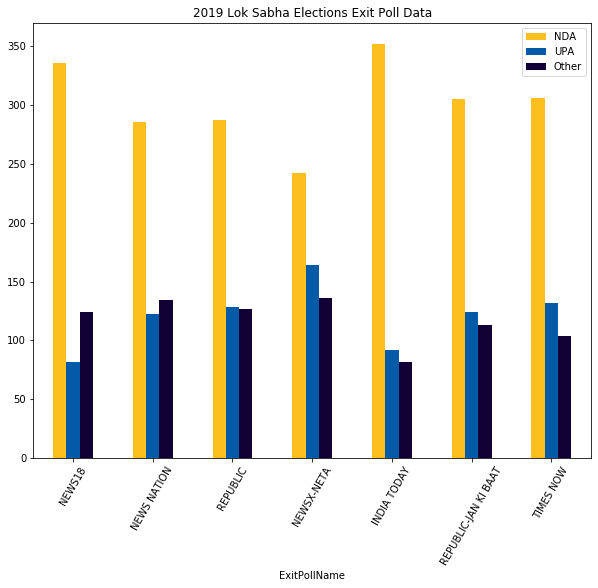

In [4]:
exitPoll2019df.set_index("ExitPollName",inplace=True)
#Using pandas dataframe plot to visualize the exit poll data of Lok Sabha Elections 2019.
exitPoll2019Bar = exitPoll2019df.plot.bar(rot=60, color=["#fcbf1e","#035aa6","#120136"], figsize=(10,8), title="2019 Lok Sabha Elections Exit Poll Data")

#### 4.1.2 Lok Sabha 2019: Election Results

> <p> <img src="https://www.economist.com/sites/default/files/images/print-edition/20190504_ASP002_0.jpg" style="float:right", width="300", height="180">NDA dominated the elections by winning the polls with 353 seats leaving UPA and Other parties with two-digit figures. Modi's ruling Bharatiya Janata Party was expected to win comfortably by forming alliances with smaller regional parties. However, results showed that BJP alone was ahead in more than 300 seats, which is comfortably beyond the 272 seat margin for the majority. After Jawaharlal Nehru and Indira Gandhi, Narendra Modi is the third prime minister of the country who has been able to retain power for a second term with full majority in Lok Sabha. <br>
<i>“Together we grow, together we prosper. Together we will build a strong and inclusive India. India wins yet again!”</i> Modi tweeted after his victory.</p>


In [5]:
#2019 Lok Sabha Election data 
electionResult2019labels = ['NDA', 'UPA', 'Others']
electionResult2019values = [353, 92, 98]
#Using plotly pie chart visualize the actual Election Results.
electionResult2019Pie = go.Figure(data=[go.Pie(labels=electionResult2019labels,
                                values=electionResult2019values, 
                                pull=[0.2, 0.1, 0.1])])
electionResult2019Pie.update_traces(hoverinfo='label+percent',
                                    textinfo='value',
                                    textfont_size=20,
                                    marker=dict(colors=["#fcbf1e","#035aa6","#120136"], 
                                        line=dict(color='#000000',
                                            width=2)))                                             
electionResult2019Pie.update_layout(margin=dict(t=50, l=0, r=0, b=0),title_text='2019 Lok Sabha Election Results')
electionResult2019Pie.show()

#### 4.1.3 Lok Sabha Election Results 2014 v 2019

><p>Compared to 2014, both Indian National Congress and Bharatiya Janata Party were able to increase their seat share significantly while other parties lost their seat shares. In 2014 the NDA alliance assumed power in the government with 336 seats. The 2014 mandate was driven by anti-incumbency and a visible frustration among the people of India with the ruling UPA government. In 2019 there was a substantial pro-incumbency wave among the citizens. The Lok Sabha election of 2019 saw the highest voter turnout of 67.11% in the history of Indian elections.</p>

In [6]:
#2014 Lok Sabha Election data 
electionResult2014labels = ['NDA', 'UPA', 'Others']
electionResult2014values = [336, 60, 147]
#Using plotly pie chart and bar to visualize the 2014 v 2019 Election Results.
#Make the pyplot subplot
electionResult2014v2019 = make_subplots(rows=2, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}],[{"type": "bar"},{"type": "bar"}]],
                                       subplot_titles=("2014 Lok Sabha Election Result", "2019 Lok Sabha Election Result"),
                                       column_widths=[0.7, 0.7], vertical_spacing=0.1)
#pyplot Pie charts subplot
electionResult2014v2019.add_trace(go.Pie(labels=electionResult2014labels, values=electionResult2014values, pull=[0.2, 0.1, 0.1]),1, 1)
electionResult2014v2019.add_trace(go.Pie(labels=electionResult2019labels, values=electionResult2019values, pull=[0.2, 0.1, 0.1]),1, 2)
electionResult2014v2019.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=["#fcbf1e","#035aa6","#120136"], line=dict(color='#000000', width=2)))
electionResult2014v2019.update_layout(margin=dict(t=100, l=0, r=0, b=0),title_text='2014 vs 2019 Lok Sabha Election Results')
#pyplot Bar subplot
electionResult2014v2019.add_trace(go.Bar(
    x=electionResult2014labels,
    y=electionResult2014values,
    width=[0.5, 0.5, 0.5],
    marker_color=["#fcbf1e","#035aa6","#120136"],
    showlegend=False
),2,1)
electionResult2014v2019.add_trace(go.Bar(
    x=electionResult2019labels,
    y=electionResult2019values,
    width=[0.5, 0.5, 0.5],
    marker_color=["#fcbf1e","#035aa6","#120136"],
    showlegend=False
),2,2)
electionResult2014v2019.show()

### 4.2 Analysing the candidates

#### 4.2.1 Candidates According To Age Group

In [7]:
#Visualization of age of candidates
candidateAge = candidatedf["AGE_GROUP_IDX"].value_counts()
candidateAge = pd.DataFrame(candidateAge)
candidateAge.index.name = "AGE_GROUP"
candidateAge.reset_index(inplace=True)
candidateAge = candidateAge.sort_values("AGE_GROUP", ascending=True)
candidateAgeBubble = go.Figure(data=[go.Scatter(
    x=["AGE 60 to 100", "AGE 50 to 59", "AGE 40 to 49", "AGE 30 to 39", "AGE 20 to 29"], y=candidateAge["AGE_GROUP_IDX"],
    mode='markers',
    marker_size=1.5*candidateAge["AGE_GROUP_IDX"],
    marker=dict(
        sizemode='area',
        color=['rgb(93, 164, 214)', 'rgb(255, 144, 14)',
               'rgb(44, 160, 101)', 'rgb(255, 65, 54)'],
        opacity=[0.8, 0.8, 0.8, 0.8, 0.8]
    )
    )
])
candidateAgeBubble.update_layout(title='Total Candidates In Each Age Group')
candidateAgeBubble.show()

In [8]:
candidateWinAgedf=candidatedf[candidatedf["WINNER"] == 1].groupby("AGE_GROUP_IDX")["WINNER"].size()
candidateLossAgedf=candidatedf[candidatedf["WINNER"] == 0].groupby("AGE_GROUP_IDX")["WINNER"].size()
candidateWinLossAgeBar = go.Figure()
candidateWinLossAgeBar.add_trace(go.Bar(
            y=candidateWinAgedf,
            x=["AGE 60 to 100", "AGE 50 to 59", "AGE 40 to 49", "AGE 30 to 39", "AGE 20 to 29"],
            marker_color='rgb(26, 118, 255)',
            opacity=0.8,
            name='WINNER'
        ))
candidateWinLossAgeBar.add_trace(go.Bar(
            y=candidateLossAgedf,
            x=["AGE 60 to 100", "AGE 50 to 59", "AGE 40 to 49", "AGE 30 to 39", "AGE 20 to 29"],
            marker_color='rgb(55, 83, 109)',
            opacity=0.8,
            name='LOSER'
        ))
candidateWinLossAgeBar.update_layout(
    title='Results As Per Age Group'
)
candidateWinLossAgeBar.show()

In [9]:
#Find the mean age
meanAge = candidatedf["AGE"].mean()
maxAge = candidatedf["AGE"].max()
minAge = candidatedf["AGE"].min()
print("Mean age of candidates: " + str(meanAge))
print("Maximum age of candidates: " + str(maxAge))
print("Minimum age of candidates: " + str(minAge))

Mean age of candidates: 49.23984867591425
Maximum age of candidates: 90
Minimum age of candidates: 24


> - The mean age of the candidates who contested the elections was 49 years.
> - The oldest candidate was aged 90 years while the youngest was 24 years old.
> - The 17th Lok Sabha has 9% of MPs below the age 40 years.
> - Only 5 cnadiates in the age group og 20 to 29 years were able to win the election.
> - The highest number of members in the 17th Lok Sabha belong to the age group of 60 to 90 years.

#### 4.2.2 Candidates According To Gender

In [10]:
genderdf = candidatedf['SEX'].value_counts()
genderdf = pd.DataFrame({'SEX':genderdf.index, 'Count':genderdf.values})

genderBar = go.Figure(go.Bar(
            x=genderdf["SEX"],
            y=genderdf["Count"],
            opacity=0.8,
            marker_color=["#eb4559","#f78259"]
        ))
genderBar.update_layout(
    title='Total Candidates In Each Gender'
)
genderBar.show()

In [11]:
genderWindf = candidatedf[candidatedf["WINNER"] == 1].groupby("SEX")["WINNER"].size()
genderWindf = pd.DataFrame({'SEX':genderWindf.index, 'Count':genderWindf.values})
genderLossdf = candidatedf[candidatedf["WINNER"] == 0].groupby("SEX")["WINNER"].size()
genderLossdf = pd.DataFrame({'SEX':genderLossdf.index, 'Count':genderLossdf.values})
genderWinLossBar = go.Figure()
genderWinLossBar.add_trace(go.Bar(
            x=genderWindf["SEX"],
            y=genderWindf["Count"],
            marker_color='rgb(26, 118, 255)',
            opacity=0.8,
            name='WINNER'
        ))
genderWinLossBar.add_trace(go.Bar(
            x=genderLossdf["SEX"],
            y=genderLossdf["Count"],
            marker_color='rgb(55, 83, 109)',
            opacity=0.8,
            name='LOSER'
        ))
genderWinLossBar.update_layout(
    title='Results As Per Gender'
)
genderWinLossBar.show()

> - 78 women MPs have been elected to the 17th Lok Sabha whereas in 2014, 62 women MPs were elected.
> - The women representation have increased from 5% in the 1st Lok Sabha to almost 14% in the 17th Lok Sabha.

### 4.3 Comparisons between states
<hr>

#### 4.3.1 Voter turnout 2014 vs 2019

In [12]:
stateVoterTurnout = statedf[["STATE","CURRENT_VOTER_TURNOUT","PREVIOUS_VOTER_TURNOUT"]]
stateVoterTurnout[["CURRENT_VOTER_TURNOUT","PREVIOUS_VOTER_TURNOUT"]] = stateVoterTurnout[["CURRENT_VOTER_TURNOUT","PREVIOUS_VOTER_TURNOUT"]]*100

In [13]:
#Using plotly scatterplot to visualize the statewise voter turnout data for 2015 and 2019 Lok Sabha Elections
stateVoterTurnoutScatter = go.Figure()
stateVoterTurnoutScatter.add_trace(go.Scatter(x=stateVoterTurnout["STATE"], y=stateVoterTurnout["CURRENT_VOTER_TURNOUT"],
                    mode='lines+markers',
                    name='2019 Voter Turnout'))
stateVoterTurnoutScatter.add_trace(go.Scatter(x=stateVoterTurnout["STATE"], y=stateVoterTurnout["PREVIOUS_VOTER_TURNOUT"],
                    mode='lines+markers',
                    name='2015 Voter Turnout'))
stateVoterTurnoutScatter.update_layout(title='Statewise Voter Turnout')
stateVoterTurnoutScatter.show()

#### 4.3.2 Literacy rate of each state

In [14]:
literacyRateScatter = go.Figure(data=go.Scatter(
    x=statedf["STATE"],
    y=statedf["LITERACY_RATE"]*100,
    mode='markers',
    marker=dict(size=statedf["LITERACY_RATE"]*25),
    marker_color='#fa744f'
))

literacyRateScatter.show()

#### 4.3.3 Criminal records per candidate in each state

In [15]:
criminalScatter = go.Figure(data=go.Scatter(x=criminaldf["STATE"],
                                y=criminaldf["PENDING_CRIMINAL_CASES_PER_CANDIDATE"],
                                mode='markers',
                                marker_color=criminaldf["PENDING_CRIMINAL_CASES_PER_CANDIDATE"],
                                text=criminaldf["STATE"])) # hover text goes here

criminalScatter.update_layout(title='Statewise Criminal Cases Per Candidate')
criminalScatter.show()

### 4.4 Analysis of key constituencies and candidates

#### 4.4.1 Analysis of Amethi constituency

In [16]:
amethidf = candidatedf[candidatedf['CONSTITUENCY'] == "AMETHI"]
amethiVoteBubble = go.Figure(data=[go.Scatter(
    x=amethidf["CANDIDATE_NAME"], y=amethidf["TOTAL_VOTES"],
    mode='markers',
    marker_color='#fa744f'
)])
amethiVoteBubble.update_layout(title='Total votes won by each candidate in Amethi')
amethiVoteBubble.show()

> Amethi is a Lok Sabha / Parliamentary constituency in the Avadh region of Uttar Pradesh in North India. The INC has never lost an election in this constituency. The seat has almost always been held by the Indian National Congress (INC). Rahul Gandhi held the seat for the most prolonged period, from 2004 to 2019, and the seat had also been held by his mother, father, and uncle. However, in the Lok Sabha Election of 2019, Rahul Gandhi lost the seat to BJP's Smriti Irani. It was a close battle. She won by a difference of 50,000 votes.

In [17]:
amethi1980to2019Scatter = go.Figure()
amethi1980to2019Scatter.add_trace(go.Scatter(x=amethi1980to2019[amethi1980to2019["Party"]=="INC"]['Year'], y=amethi1980to2019[amethi1980to2019["Party"]=="INC"]["Votes"],
                    mode='lines+markers',
                    name='INC',
                    line=dict(color='#035aa6', width=4)))
amethi1980to2019Scatter.add_trace(go.Scatter(x=amethi1980to2019[amethi1980to2019["Party"]=="BJP"]['Year'], y=amethi1980to2019[amethi1980to2019["Party"]=="BJP"]["Votes"],
                    mode='lines+markers',
                    name='BJP',
                    line=dict(color='#fcbf1e', width=4, dash='dash')))
amethi1980to2019Scatter.update_layout(
    xaxis_type='category', title="1980 to 2019 Seat Share of INC and BJP in Amethi"
)
amethi1980to2019Scatter.show()

> The scatter plot goes on to show how Congress held on to the seat of Amethi for so long. The BJP was not even in the picture until 1991. During the period of 1998 to 2009, BJP actually lost vote share while INC gained. The difference in voting share during this period is stark. However, in the period of 2009 to 2019, BJP started to gain vote share massively after Smriti Irani was fielded as a candidate against Rahul Gandhi.

## 5. Analysis of BJP and INC from 1980 to 2019

In [18]:
seats1980to2019scatter = go.Figure()
# Add traces
seats1980to2019scatter.add_trace(go.Scatter(x=seats1980to2019["Year"],y=seats1980to2019["INC"],
                    mode='lines+markers',
                    name='INC',
                    line=dict(color='#035aa6', width=4)))
seats1980to2019scatter.add_trace(go.Scatter(x=seats1980to2019["Year"],y=seats1980to2019["BJP"],
                    mode='lines+markers',
                    name='BJP',
                    line=dict(color='#fcbf1e', width=4)))
seats1980to2019scatter.update_layout(
    xaxis_type='category', title="1980 to 2019 Seat Share of INC and BJP"
)
seats1980to2019scatter.show()